Week 1

Question 1

In [5]:
import numpy as np

# Generate Hilbert matrix for n = 4 and n = 8
def hilbert_matrix(n):
    H = np.array([[1.0 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])
    return H

# Compute condition number
n_values = [4, 8]
for n in n_values:
    H = hilbert_matrix(n)
    cond_H = np.linalg.cond(H)
    print(f"Condition number for n = {n}: {cond_H}")

Condition number for n = 4: 15513.738738929662
Condition number for n = 8: 15257576052.786306


Question 2

In [8]:
import numpy as np
class HilbertMatrix:
    def __init__(self, n, sigma):
        self.n = n
        self.sigma = sigma
        self.H = self._generate_hilbert()
        self.A = self.H + sigma * np.eye(n)

    def _generate_hilbert(self):
        return np.array([[1.0 / (i + j - 1) for j in range(1, self.n + 1)] for i in range(1, self.n + 1)])

    def condition_number(self):
        return np.linalg.cond(self.A)

# Compute condition number for n = 4, sigma = 0.5
matrix = HilbertMatrix(4, 0.5)
cond_A = matrix.condition_number()
print(f"Condition number for n = 4, sigma = 0.5: {cond_A}")

# Compute condition number for n = 8, sigma = 0.5
matrix = HilbertMatrix(8, 0.5)
cond_A = matrix.condition_number()
print(f"Condition number for n = 8, sigma = 0.5: {cond_A}")

Condition number for n = 4, sigma = 0.5: 3.999655008409268
Condition number for n = 8, sigma = 0.5: 4.391877992867548


Week 2

100%|████████████████████████████████████████| 170M/170M [00:12<00:00, 14.0MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Epoch [1/50], Step [100/500], Loss: 2.2840
Epoch [1/50], Step [200/500], Loss: 2.0204
Epoch [1/50], Step [300/500], Loss: 1.8966
Epoch [1/50], Step [400/500], Loss: 1.6277
Epoch [1/50], Step [500/500], Loss: 1.7244
Epoch [2/50], Step [100/500], Loss: 1.5352
Epoch [2/50], Step [200/500], Loss: 1.5922
Epoch [2/50], Step [300/500], Loss: 1.4846
Epoch [2/50], Step [400/500], Loss: 1.5840
Epoch [2/50], Step [500/500], Loss: 1.5733
Epoch [3/50], Step [100/500], Loss: 1.3545
Epoch [3/50], Step [200/500], Loss: 1.2381
Epoch [3/50], Step [300/500], Loss: 1.1853
Epoch [3/50], Step [400/500], Loss: 1.2094
Epoch [3/50], Step [500/500], Loss: 1.2557
Epoch [4/50], Step [100/500], Loss: 1.4775
Epoch [4/50], Step [200/500], Loss: 1.3405
Epoch [4/50], Step [300/500], Loss: 1.2974
Epoch [4/50], Step [400/500], Loss: 1.2681
Epoch [4/50], Step [500/500], Loss: 1.2653
Epoch [5/50], Step [100/500], Loss: 1.0930
Epoch [5/50]

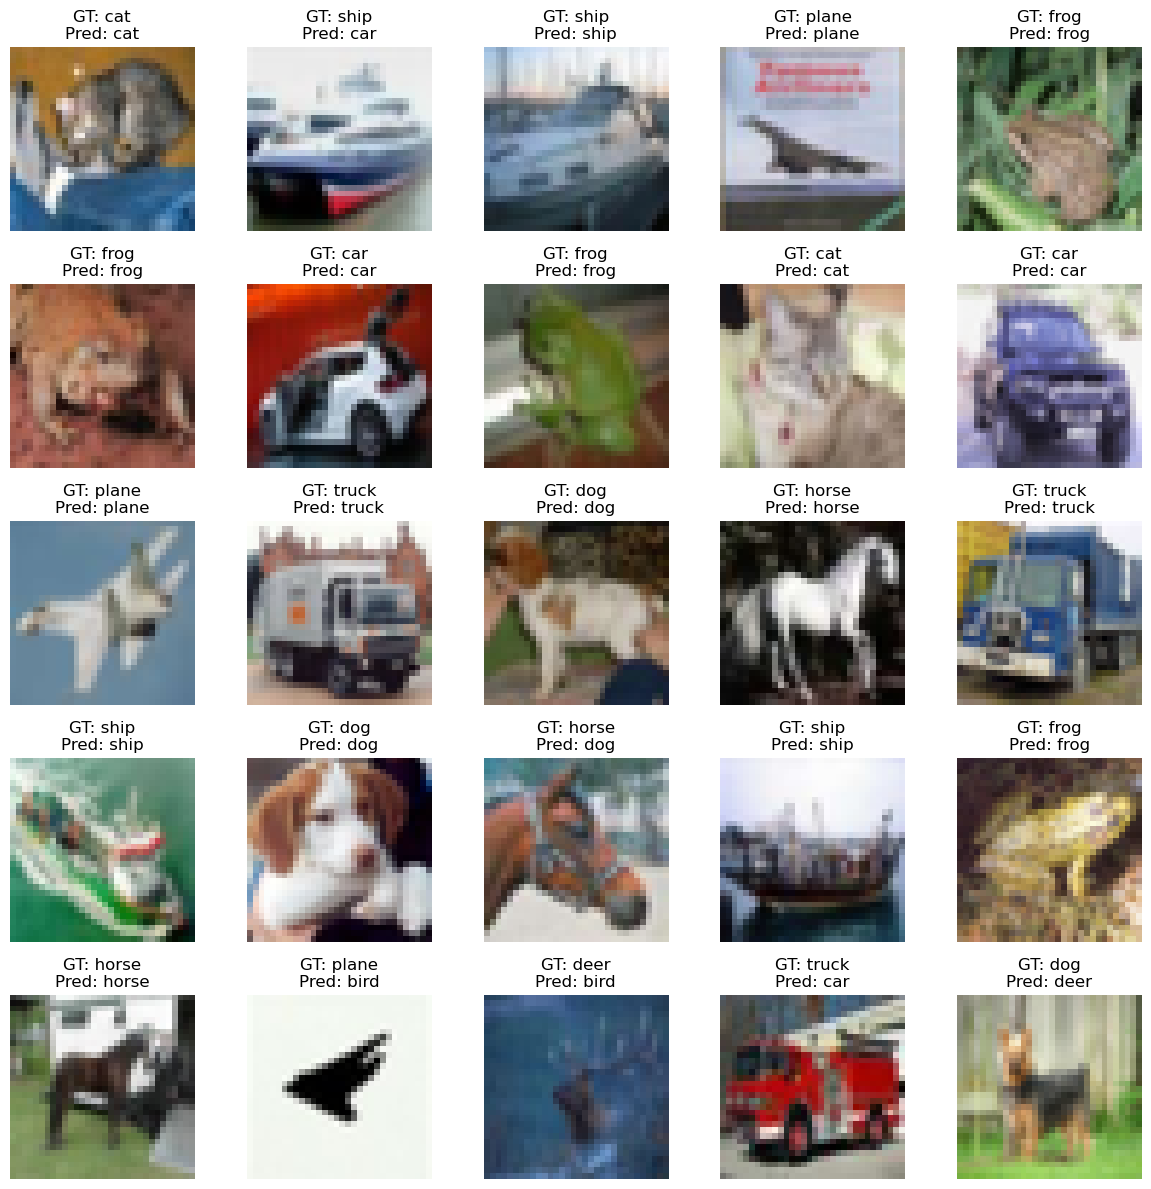

In [11]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets


# Define the neural network
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


# Training loop
def train(num_epochs, model, loaders):
    model.train()
    total_step = len(loaders['train'])
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            b_x = Variable(images)  # batch x
            b_y = Variable(labels)  # batch y
            output = model(b_x)
            loss = loss_func(output, b_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_step}], Loss: {loss.item():.4f}')


# Evaluate and plot montage
def plot_montage(model, loader, classes, num_images=25):
    model.eval()
    images, labels = next(iter(loader))
    images, labels = images[:num_images], labels[:num_images]
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(5, 5, figsize=(12, 12))
    axes = axes.flatten()
    for idx in range(num_images):
        img = images[idx].numpy().transpose(1, 2, 0)
        axes[idx].imshow(img)
        axes[idx].set_title(f'GT: {classes[labels[idx]]}\nPred: {classes[predicted[idx]]}')
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    # Initialize the model
    model = ConvNet()

    # Define optimizer and loss function
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    loss_func = nn.CrossEntropyLoss()

    # Load CIFAR10 dataset
    train_data = datasets.CIFAR10(
        root='data',
        train=True,
        transform=transforms.ToTensor(),
        download=True
    )
    test_data = datasets.CIFAR10(
        root='data',
        train=False,
        transform=transforms.ToTensor(),
        download=True
    )

    # Define classes
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # Create data loaders
    loaders = {
        'train': torch.utils.data.DataLoader(
            train_data,
            batch_size=100,
            shuffle=True,
            num_workers=0  # Set to 0 to avoid spawn issues on Windows
        ),
        'test': torch.utils.data.DataLoader(
            test_data,
            batch_size=100,
            shuffle=False,
            num_workers=0  # Set to 0 to avoid spawn issues on Windows
        )
    }

    # Train the model
    num_epochs = 50
    train(num_epochs, model, loaders)

    # Plot montage of test images
    plot_montage(model, loaders['test'], classes)

    # Keep the plot window open
    plt.show()

## Homework

- Try training the segmentation problem again with DICE loss function.
- The DICE coefficient is a measure of how well two sets coincide with one another, i.e. how well two segmentation results are similar. We use the output of our network, $u$, and the ground truth, $GT$, to measure performance.
$$ DICE(u,GT) = \frac{ 2 \cdot | u \cdot GT |}{|u| + |GT|} $$


- A score of 1 is a perfect match, whereas a score of 0 is the opposite. We want a score of 1 in segmentation.
- To use this in a loss function, the loss function looks like:
$$ DICELOSS(u,GT) = 1 - DICE(u,GT) $$

In [27]:
import torch
from skimage import io, transform
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [29]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

torch.Size([60000, 28, 28])


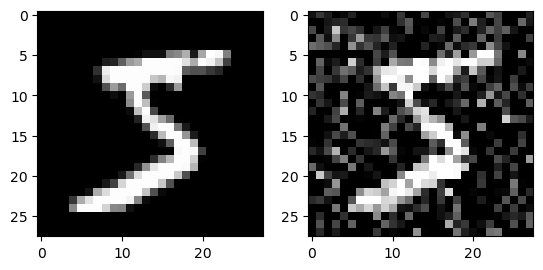

In [31]:
train_imgs = train_data.data
print(train_imgs.shape)
train_imgs = train_imgs.numpy() # pixel of 0 is black, pixel of 255 is white
# store the clean images before adding noise
train_imgs0 = train_imgs/255.0 # [0,1]

test_imgs = test_data.data
test_imgs = test_imgs.numpy()
test_imgs0 = test_imgs/255.0

sigma = 70/255.0 # noise level
train_imgs = (train_imgs/255.0 + np.random.normal(0,sigma,train_imgs.shape)).clip(0,1)
test_imgs = (test_imgs/255.0 + np.random.normal(0,sigma,test_imgs.shape)).clip(0,1)


fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(train_imgs0[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(train_imgs[0],cmap='gray')
plt.show()

In [32]:
class CNN(nn.Module):
    def __init__(self,in_channels,out_channels):
        super(CNN, self).__init__()
        f = [8,16,32,16,8,out_channels]
# Input to conv1 will be image of shape [batch_size,1,img_size,img_size]
        self.conv1 = nn.Sequential(   
            nn.Conv2d(in_channels=in_channels,out_channels=f[0],kernel_size=(3,3),padding=1), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=(2,2)) 
        )
        self.conv2 = nn.Sequential( 
            nn.Conv2d(in_channels=f[0],out_channels=f[1],kernel_size=(3,3),padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)) 
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=f[1],out_channels=f[2],kernel_size=(3,3),padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=f[2],out_channels=f[2],kernel_size=(3,3),padding=1),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=f[2],out_channels=f[3],kernel_size=(3,3),padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2))
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=f[3],out_channels=f[4],kernel_size=(3,3),padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2))
        
        
        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=f[4],out_channels=f[5],kernel_size=(1,1)),
            nn.Sigmoid()
        )
            

    def forward(self, x,plot=False):

        x1 = self.conv1(x)
        x2 = self.conv2(x1)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)
        x5 = self.conv5(x4)
        x6 = self.conv6(x5)
        
        if plot:
            print('Input shape', x.shape)
            print('After layer 1', x1.shape)
            print('After layer 2', x2.shape)
            print('After layer 3', x3.shape)
            print('After layer 4', x4.shape)
            print('After layer 5', x5.shape)
            print('After layer 6', x6.shape)

        return x6

model = CNN(in_channels=3, out_channels=1)

In [33]:
model = CNN(in_channels=1, out_channels = 1).to(device)

In [37]:
learning_rate = 0.001

optimizer = optim.Adam(model.parameters(), lr = learning_rate)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [39]:
total_step = len(train_imgs)
print(total_step)
train_imgs.shape

60000


(60000, 28, 28)

In [41]:
loaders = {
    'train' : torch.utils.data.DataLoader(train_imgs, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_imgs, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x2c832fcb0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2c832d910>}

In [72]:
import torch
import torch.nn as nn

class DiceLoss(nn.Module):
    def __init__(self, smooth: float = 1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, pred: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        # flatten predictions and targets to shape [bs, H*W]
        bs = pred.size(0)
        pred_flat   = pred.view(bs, -1)
        target_flat = target.view(bs, -1)

        # compute intersection and dice coefficient
        intersection = (pred_flat * target_flat).sum(dim=1)
        dice_score   = (2.0 * intersection + self.smooth) / (
            pred_flat.sum(dim=1) + target_flat.sum(dim=1) + self.smooth
        )

        # dice loss = 1 − dice_score, averaged over batch
        loss = 1.0 - dice_score
        return loss.mean()

In [76]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Step 1: Convert to tensors and add channel dimension
train_noisy = torch.from_numpy(train_imgs).unsqueeze(1).float()    # [60000,1,28,28]
train_clean = torch.from_numpy(train_imgs0).unsqueeze(1).float()   # [60000,1,28,28]

# Step 2: Build dataset of (noisy, clean) pairs
train_ds = TensorDataset(train_noisy, train_clean)

# Step 3: Use num_workers=0 for notebook stability
train_loader = DataLoader(train_ds, batch_size=100, shuffle=True, num_workers=0)
loaders = {'train': train_loader}

In [78]:
num_epochs = 10
loss_func  = DiceLoss()

def train(num_epochs, model, loaders):
    model.train()
    total_step = len(loaders['train'])
    for epoch in range(num_epochs):
        for i, (b_x, b_y) in enumerate(loaders['train']):
            b_x = b_x.to(device)  # noisy, [bs,1,28,28]
            b_y = b_y.to(device)  # clean, [bs,1,28,28]

            outputs = model(b_x.float())
            loss = loss_func(outputs, b_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Dice Loss: {loss.item():.4f}')

# start training
train(num_epochs, model, loaders)

Epoch [1/10], Step [100/600], Dice Loss: 0.3426
Epoch [1/10], Step [200/600], Dice Loss: 0.2775
Epoch [1/10], Step [300/600], Dice Loss: 0.2601
Epoch [1/10], Step [400/600], Dice Loss: 0.2518
Epoch [1/10], Step [500/600], Dice Loss: 0.2287
Epoch [1/10], Step [600/600], Dice Loss: 0.2337
Epoch [2/10], Step [100/600], Dice Loss: 0.2396
Epoch [2/10], Step [200/600], Dice Loss: 0.2340
Epoch [2/10], Step [300/600], Dice Loss: 0.2191
Epoch [2/10], Step [400/600], Dice Loss: 0.2302
Epoch [2/10], Step [500/600], Dice Loss: 0.2271
Epoch [2/10], Step [600/600], Dice Loss: 0.2317
Epoch [3/10], Step [100/600], Dice Loss: 0.2198
Epoch [3/10], Step [200/600], Dice Loss: 0.2134
Epoch [3/10], Step [300/600], Dice Loss: 0.2229
Epoch [3/10], Step [400/600], Dice Loss: 0.2222
Epoch [3/10], Step [500/600], Dice Loss: 0.2266
Epoch [3/10], Step [600/600], Dice Loss: 0.2200
Epoch [4/10], Step [100/600], Dice Loss: 0.2221
Epoch [4/10], Step [200/600], Dice Loss: 0.2106
Epoch [4/10], Step [300/600], Dice Loss:

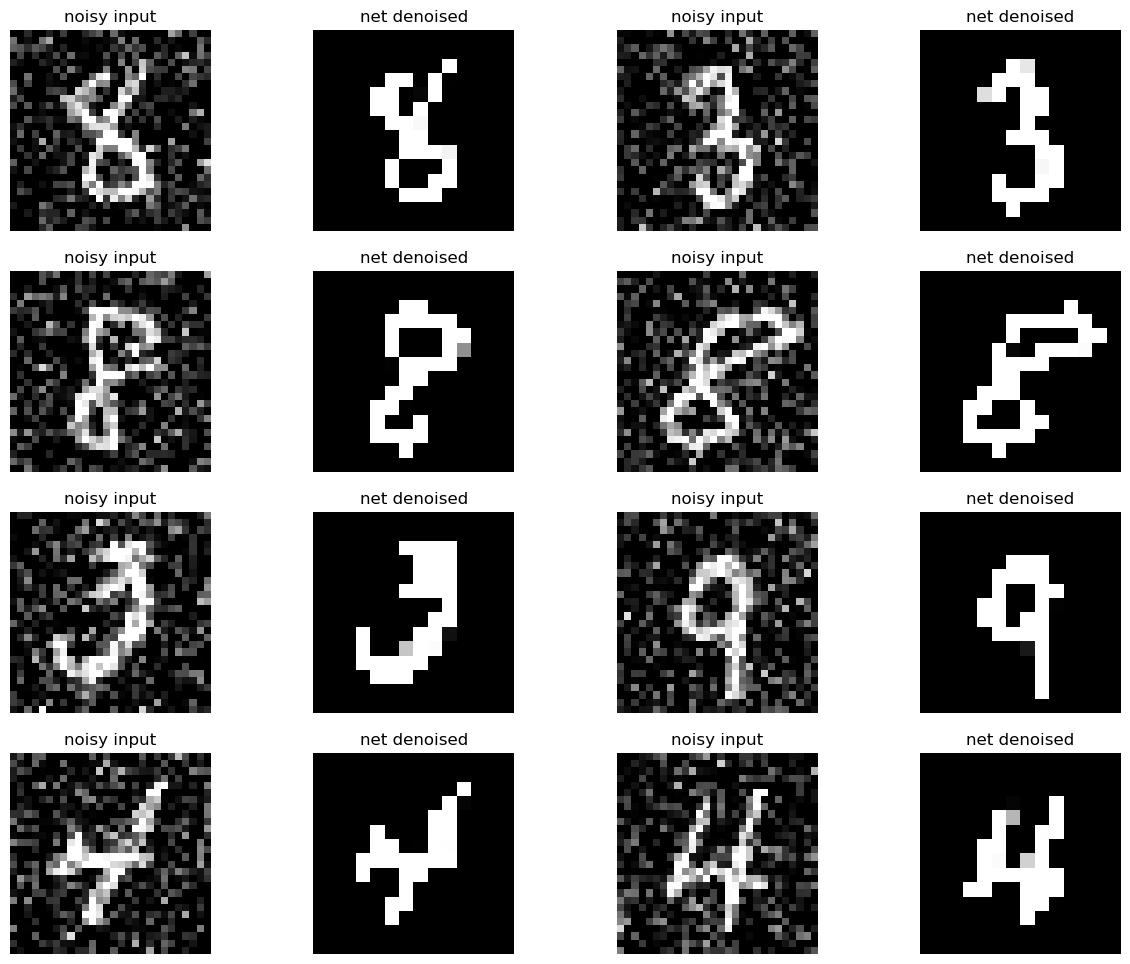

In [80]:
with torch.no_grad():
    #Plot multiple
    figure = plt.figure(figsize=(15, 12))
    cols, rows =4,4
    for i in range(1, int((cols * rows)/2) + 1):
        sample_idx = torch.randint(len(test_imgs), size=(1,)).item()
        noisy, clean = test_imgs[sample_idx], test_imgs0[sample_idx]
        noisy = noisy[np.newaxis,np.newaxis,:,:] #[1,1,height,width]
        b_x = torch.from_numpy(noisy).float()
        b_x = b_x.to(device)
        output = model(b_x)
        output = output.cpu()

        figure.add_subplot(rows,cols,2*i - 1)
        plt.title('noisy input')
        plt.axis("off")
        plt.imshow(noisy.squeeze(),cmap="gray")

        figure.add_subplot(rows,cols,2*i)
        plt.title('net denoised')
        plt.axis("off")
        plt.imshow(output.squeeze(),cmap="gray")

    plt.show()

In [8]:
import os
import cv2
import numpy as np

test_input_path = '/Users/macbook/Desktop/CMIT/Colab/data4notebooks/test_input'    # Path to test images
test_masks_path = '/Users/macbook/Desktop/CMIT/Colab/data4notebooks/test_binary_masks'     # Path to test masks

# Automatically get all image and mask filenames from the folders
# Modify the extension if your files are not .png/.jpg
test_input_filenames = sorted([f for f in os.listdir(test_input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif'))])
test_masks_filenames = sorted([f for f in os.listdir(test_masks_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif'))])

print("First few test image files:", test_input_filenames[:3])
print("First few test mask files:", test_masks_filenames[:3])

# Read test images and masks
test_img = [cv2.imread(os.path.join(test_input_path, x), cv2.IMREAD_ANYDEPTH) for x in test_input_filenames]
test_masks = [cv2.imread(os.path.join(test_masks_path, x), cv2.IMREAD_ANYDEPTH) for x in test_masks_filenames]

First few test image files: ['t151.tif', 't152.tif', 't153.tif']
First few test mask files: ['man_seg151.tif', 'man_seg152.tif', 'man_seg153.tif']


In [30]:
# Function to create random patches from images and corresponding masks
def create_random_patches(imgs, masks, num_patches, shape):
    """
    Create a list of random image patches and their corresponding mask patches.
    Args:
        imgs (list): List of input images.
        masks (list): List of corresponding mask images.
        num_patches (int): Number of patches to extract from each image.
        shape (list or tuple): Size of each patch, e.g., [256, 256].
    Returns:
        input_patches, output_patches: Lists of image and mask patches.
    """
    input_patches = []
    output_patches = []
    height, width = shape
    for img, mask in zip(imgs, masks):
        img_height, img_width = img.shape[:2]
        for _ in range(num_patches):
            x = np.random.randint(0, img_width - width)
            y = np.random.randint(0, img_height - height)
            input_patch = img[y:y+height, x:x+width]
            output_patch = mask[y:y+height, x:x+width]
            input_patches.append(input_patch)
            output_patches.append(output_patch)
    return input_patches, output_patches

# Extract random patches from test images and masks (e.g., 2 patches per image)
test_input_patches, test_output_patches = create_random_patches(test_img, test_masks, 2, [256, 256])

# Percentile-based normalization function (same as used for training images)
def normalizePercentile(x, pmin=1, pmax=99.8, axis=None, eps=1e-20):
    """
    Normalize image intensities to [0, 1] using percentiles.
    """
    mi = np.percentile(x, pmin, axis=axis, keepdims=True)
    ma = np.percentile(x, pmax, axis=axis, keepdims=True)
    x = (x - mi) / (ma - mi + eps)
    return np.clip(x, 0, 1)

# Normalize the test input patches
X_test = [normalizePercentile(x) for x in test_input_patches]
Y_test = test_output_patches  # Usually masks do not need normalization

# Convert to numpy arrays for model input
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Optional: print shapes to verify
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_test shape: (180, 256, 256)
Y_test shape: (180, 256, 256)


In [32]:
X_test = np.expand_dims(X_test, axis=-1)
Y_test = np.expand_dims(Y_test, axis=-1)
print(X_test.shape)
print(Y_test.shape)

(180, 256, 256, 1)
(180, 256, 256, 1)


In [36]:
!pip uninstall -y numpy scikit-learn

Found existing installation: numpy 2.1.3
Uninstalling numpy-2.1.3:
  Successfully uninstalled numpy-2.1.3
Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2


In [55]:
import numpy

print("numpy version:", numpy.__version__)

numpy version: 2.1.3


In [53]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 8.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 9.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.1 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.3.1 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.3.1 w

In [61]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet(input_shape=(256, 256, 1), num_classes=1):
    """Build a simple U-Net model.

    Args:
        input_shape (tuple): Shape of input images, e.g. (256, 256, 1) for grayscale.
        num_classes (int): Number of output classes. Use 1 for binary mask.

    Returns:
        Keras Model object.
    """

    inputs = layers.Input(shape=input_shape)

    # Encoder (Downsampling)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder (Upsampling)
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    # Output layer
    if num_classes == 1:
        output_activation = 'sigmoid'
    else:
        output_activation = 'softmax'
    outputs = layers.Conv2D(num_classes, (1, 1), activation=output_activation)(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

In [65]:
model = unet(input_shape=(256, 256, 1), num_classes=1)
Y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 7s/step


In [69]:
from tensorflow.keras.losses import BinaryCrossentropy

bce = BinaryCrossentropy()
bce_loss = bce(Y_test, Y_pred).numpy()
print("Binary Crossentropy (BCE) on test set:", bce_loss)

Binary Crossentropy (BCE) on test set: 0.68814504


In [71]:
import numpy as np

def jaccard_index(y_true, y_pred, threshold=0.5, eps=1e-7):
    """Calculate mean IoU for a batch"""
    y_pred = (y_pred > threshold).astype(np.float32)
    y_true = (y_true > threshold).astype(np.float32)
    intersection = np.sum(y_true * y_pred, axis=(1,2,3))
    union = np.sum(y_true + y_pred, axis=(1,2,3)) - intersection
    iou = (intersection + eps) / (union + eps)
    return np.mean(iou)

mean_iou = jaccard_index(Y_test, Y_pred)
print("Mean Jaccard Index (IoU) on test set:", mean_iou)

Mean Jaccard Index (IoU) on test set: 0.13517971


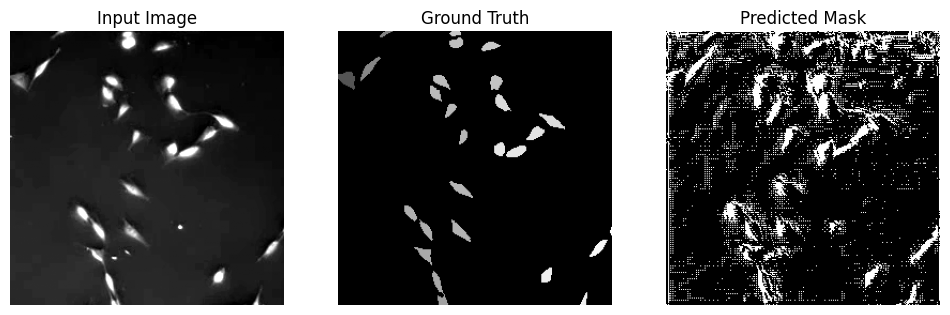

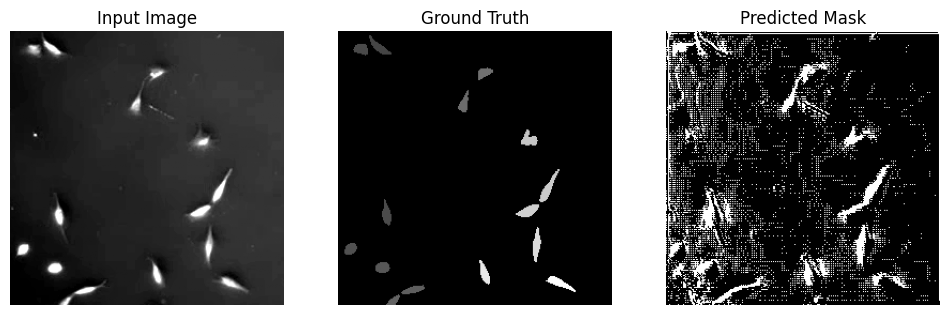

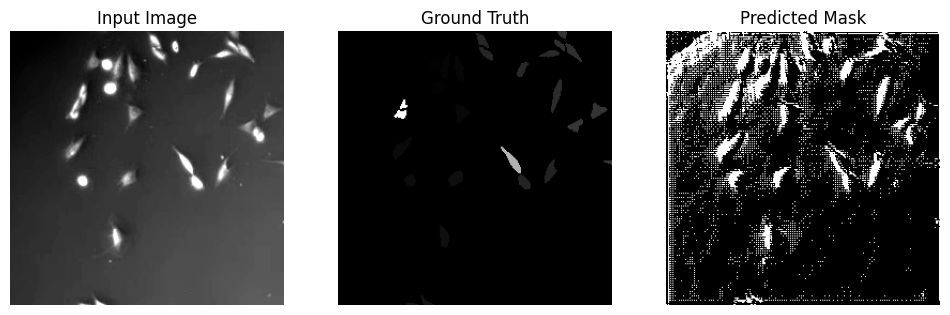

In [73]:
import matplotlib.pyplot as plt

# Display a few test images, ground truth and predictions
n_show = 3  # Show first 3 samples
for i in range(n_show):
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(X_test[i,:,:,0], cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(Y_test[i,:,:,0], cmap='gray')
    plt.title('Ground Truth')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(Y_pred[i,:,:,0] > 0.5, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')
    plt.show()

## Homework

__Task__: Make adaptations to the above code (i.e. use the cross-entropy method from deep inforcement learning) to find the so-called Longest Increasing Subsequence (LIS) of the sequence [17, 15, 3, 22, 9, 13, 33, 21, 50, 40, 50, 42, 65, 60, 5, 70]. <br>

The Longest Increasing Subsequence Problem asks to find a subsequence of a given sequence in which the subsequence's elements are sorted in an ascending order and in which the subsequence is as long as possible. For instance, the LIS of the sequence [0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15] is [0, 2, 6, 9, 11, 15].

__Hints__: The following are just hints. You don't need to follow them as long as you find a rather long increasing subsequence with your code. Aim for finding the longest increasing subsequence.<br>

* You have to think about how you want to represent the states and actions. (For instance, you can represent the current selection of the subsequence by a binary 0/1 vector, where a 1 in position i represents that you have currently chosen the ith term in the sequence; an action could be a binary vector with a single 1 representing the term which you want to add to the subsequence.) 

* You probably need to program three mini-functions: One that gives you an initial state, one that selects an action as recommened by your NN, and one that performs a specified action given a state.

* Don't use this line "while reward_mean < REWARD_GOAL:". Substitute it in an appropriate way so that you find the longest (or at least a rather long) increasing subsequence of the given input sequence.

* An episode could create an increasing subsequence. Then the corresponding reward could be the length of this increasing subsequence. 

Step 1: Define the Environment (LISEnv)

In [105]:
import numpy as np
import gym
from gym import spaces

class LISEnv(gym.Env):
    def __init__(self, sequence):
        super().__init__()
        self.seq = sequence
        self.N = len(sequence)
        # State: selected mask + last index (one-hot), total dim = 2N
        self.observation_space = spaces.Box(0.0, 1.0, (2 * self.N,), dtype=np.float32)
        # Action: choose an index from 0..N-1
        self.action_space = spaces.Discrete(self.N)

    def reset(self):
        self.mask = np.zeros(self.N, dtype=np.float32)
        self.last_idx = None
        self.done = False
        return self._encode_state()

    def _encode_state(self):
        # One-hot for last selected index
        one_hot = np.zeros(self.N, dtype=np.float32)
        if self.last_idx is not None:
            one_hot[self.last_idx] = 1.0
        return np.concatenate([self.mask, one_hot])

    def step(self, action):
        if self.done:
            raise RuntimeError("Episode already done")
        val = self.seq[action]

        if (
            self.mask[action] == 1 or
            (self.last_idx is not None and (
                action <= self.last_idx or val <= self.seq[self.last_idx]
            ))
        ):
            reward = 0.0
            self.done = True
        else:
            reward = 1.0
            self.mask[action] = 1.0
            self.last_idx = action
        
            if all(
                self.mask[j] == 1 or 
                j <= self.last_idx or
                self.seq[j] <= val
                for j in range(self.N)
            ):
                self.done = True
        return self._encode_state(), reward, self.done, {}

Step 2: Initialize Network and Hyperparameters

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim

# Example sequence and environment
sequence = [17, 15, 3, 22, 9, 13, 33, 21, 50, 40, 50, 42, 65, 60, 5, 70]
env = LISEnv(sequence)
N = len(sequence)

# Network structure: 2N input -> hidden -> N output
obs_size = 2 * N
n_actions = N
HIDDEN = 128
net = nn.Sequential(
    nn.Linear(obs_size, HIDDEN),
    nn.ReLU(),
    nn.Linear(HIDDEN, n_actions)
)

# Optimizer and loss
optimizer = optim.Adam(net.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
sm = nn.Softmax(dim=1)

# CEM Hyperparameters
BATCH_SIZE = 100
PERCENTILE = 30
REWARD_GOAL = 6.0   # Target mean LIS length
MAX_ITERS = 1000    # Max safe iterations

Step 3: Cross-Entropy Method Training Loop

import numpy as np
import time

start_time = time.time()
mean_reward = 0.0
iter_no = 0

while mean_reward < REWARD_GOAL and iter_no < MAX_ITERS:
    # 1) Sample BATCH_SIZE episodes
    batch = []
    for _ in range(BATCH_SIZE):
        state = env.reset()
        total_r = 0.0
        steps = []
        while True:
            # Get policy prediction, sample action
            state_t = torch.FloatTensor([state])
            probs = sm(net(state_t)).detach().numpy()[0]
            action = np.random.choice(n_actions, p=probs)
            next_state, r, done, _ = env.step(action)
            steps.append((state, action))
            total_r += r
            state = next_state
            if done:
                batch.append((total_r, steps))
                break

    # 2) Select elite samples
    rewards = np.array([r for r, _ in batch])
    mean_reward = rewards.mean()
    threshold = np.percentile(rewards, 100 - PERCENTILE)

    elite_states = []
    elite_actions = []
    for r, steps in batch:
        if r > threshold:
            for (s, a) in steps:
                elite_states.append(s)
                elite_actions.append(a)

    # 3) Use elite samples to do one step of supervised update
    if elite_states:
        state_t = torch.FloatTensor(elite_states)
        acts_t = torch.LongTensor(elite_actions)

        optimizer.zero_grad()
        logits = net(state_t)
        loss = criterion(logits, acts_t)
        loss.backward()
        optimizer.step()

    print(f"Iteration {iter_no:03d} | loss={loss.item():.3f} | mean_len={mean_reward:.3f}")
    iter_no += 1

print(f"Training done in {time.time()-start_time:.1f}s, final mean length={mean_reward:.3f}")

Step 4: Policy Evaluation (Greedy Decoding)

In [113]:
state = env.reset()
lis = []
while True:
    state_t = torch.FloatTensor([state])
    probs = sm(net(state_t)).detach().numpy()[0]
    action = int(np.argmax(probs))  # Greedily pick the most probable action
    next_state, reward, done, _ = env.step(action)
    if reward > 0:
        lis.append(sequence[action])
    state = next_state
    if done:
        break

print("Resulting LIS:", lis)

Resulting LIS: [3, 9, 13, 33, 40, 50, 65, 70]


## Monte Carlo Methods in Reinforcement Learning Tasks for students:
* 1. Change epsilon value in mc_control_epsilon_greedy and observe differences
* 2. Try using every-visit instead of first-visit in MC prediction
* 3. Modify reward structure or create a simplified Blackjack variant
* 4. Plot policy (stick/hit) as 2D map
* 5. Compare performance of learned policy with random policy

Task 1：Change epsilon value in mc_control_epsilon_greedy and observe differences

Epsilon=0.01, Average Return=-0.0979
Epsilon=0.05, Average Return=-0.0649
Epsilon=0.10, Average Return=-0.0721
Epsilon=0.20, Average Return=-0.0598
Epsilon=0.40, Average Return=-0.0527


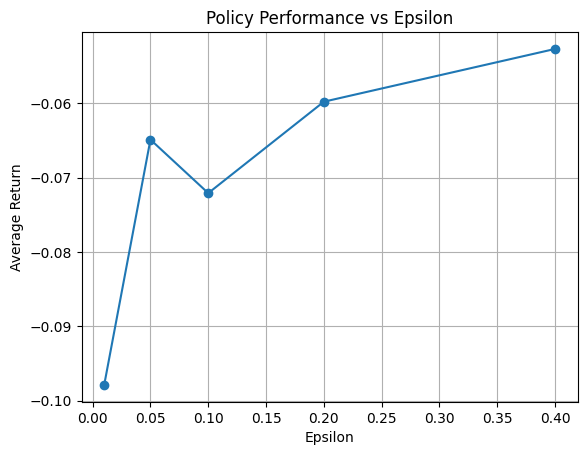

In [145]:
import gymnasium as gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

def generate_episode(policy, env):
    """Generate an episode following the given policy."""
    episode = []
    state, _ = env.reset()
    while True:
        action = policy(state)
        next_state, reward, done, truncated, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done or truncated:
            break
    return episode

def epsilon_greedy_policy(Q, epsilon, nA):
    """Return a policy function that selects epsilon-greedy actions based on Q."""
    def policy_fn(state):
        if np.random.rand() < epsilon:
            return np.random.choice(nA)
        else:
            return np.argmax(Q[state])
    return policy_fn

def mc_control_epsilon_greedy(env, num_episodes=100000, epsilon=0.1):
    """Monte Carlo Control using epsilon-greedy policies."""
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    for _ in range(num_episodes):
        policy = epsilon_greedy_policy(Q, epsilon, env.action_space.n)
        episode = generate_episode(policy, env)
        G = 0
        seen_state_action = set()
        for state, action, reward in reversed(episode):
            G += reward
            if (state, action) not in seen_state_action:
                seen_state_action.add((state, action))
                returns_sum[(state, action)] += G
                returns_count[(state, action)] += 1
                Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]
                
    def final_policy(state):
        return np.argmax(Q[state])
    return Q, final_policy

def evaluate_policy(policy, env, num_episodes=10000):
    """Evaluate average return of a given policy."""
    total_reward = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = policy(state)
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
    return total_reward / num_episodes

# Main experiment: try different epsilon values
env = gym.make("Blackjack-v1", sab=True)
epsilons = [0.01, 0.05, 0.1, 0.2, 0.4]
avg_returns = []

for eps in epsilons:
    Q, pol = mc_control_epsilon_greedy(env, num_episodes=100000, epsilon=eps)
    avg = evaluate_policy(pol, gym.make("Blackjack-v1", sab=True), num_episodes=10000)
    avg_returns.append(avg)
    print(f"Epsilon={eps:.2f}, Average Return={avg:.4f}")

# Plot the effect of epsilon on average return
plt.figure()
plt.plot(epsilons, avg_returns, marker='o')
plt.title("Policy Performance vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Average Return")
plt.grid()
plt.show()

Task 2: Try using every-visit instead of first-visit in MC prediction

In [147]:
from collections import defaultdict
import numpy as np

def generate_episode(policy, env):
    """Generate an episode following the given policy."""
    episode = []
    state, _ = env.reset()
    done = False
    while not done:
        action = policy(state)
        next_state, reward, done, truncated, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
    return episode

def mc_prediction_every_visit(policy, env, num_episodes=50000):
    """Every-visit Monte Carlo prediction to estimate V(s) for a given policy."""
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    V = defaultdict(float)
    for _ in range(num_episodes):
        episode = generate_episode(policy, env)
        G = 0
        for s, a, r in reversed(episode):
            G += r
            returns_sum[s] += G
            returns_count[s] += 1.0
            V[s] = returns_sum[s] / returns_count[s]
    return V

# Example: predict V(s) under a random policy in Blackjack
import gymnasium as gym
env = gym.make("Blackjack-v1", sab=True)
random_policy = lambda s: np.random.choice([0, 1])  # 0 = stick, 1 = hit

V = mc_prediction_every_visit(random_policy, env, num_episodes=50000)
print(f"Estimated value for some sample states:\n")
for k in list(V.keys())[:5]:
    print(f"State: {k}, V(s): {V[k]:.4f}")

Estimated value for some sample states:

State: (19, 5, 0), V(s): -0.1631
State: (9, 5, 0), V(s): -0.2296
State: (14, 10, 0), V(s): -0.6203
State: (18, 10, 0), V(s): -0.5447
State: (18, 3, 1), V(s): -0.2571


Task 3 : Modify reward structure or create a simplified Blackjack variant

In [153]:
import gymnasium as gym
from collections import defaultdict
import numpy as np

# Define a Wrapper that simplifies reward to +1 / 0 / -1.
class SimpleBlackjackEnv(gym.Wrapper):
    def step(self, action):
        state, reward, done, truncated, info = self.env.step(action)
        if done:
            if reward > 0:
                reward =  1.0
            elif reward < 0:
                reward = -1.0
            else:
                reward =  0.0
        return state, reward, done, truncated, info

# Creating a Simplified Environment
base_env   = gym.make("Blackjack-v1", sab=True)
simple_env = SimpleBlackjackEnv(base_env)

# Learning strategies on a simplified environment with the previously defined mc_control_epsilon_greedy
Q, simple_policy = mc_control_epsilon_greedy(
    simple_env,
    num_episodes=50000,
    epsilon=0.1
)

# Define an evaluation function to estimate the average return of the strategy
def evaluate_policy(policy, env, n_episodes=10000):
    total_return = 0.0
    for _ in range(n_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = policy(state)   
            state, reward, done, truncated, _ = env.step(action)
            total_return += reward
    return total_return / n_episodes

# Evaluate and print average returns in a simplified environment
avg_return_simple = evaluate_policy(simple_policy, simple_env)
print(f"Average return in simplified Blackjack: {avg_return_simple:.4f}")

Average return in simplified Blackjack: -0.0889


Task 4: Plot policy (stick/hit) as 2D map

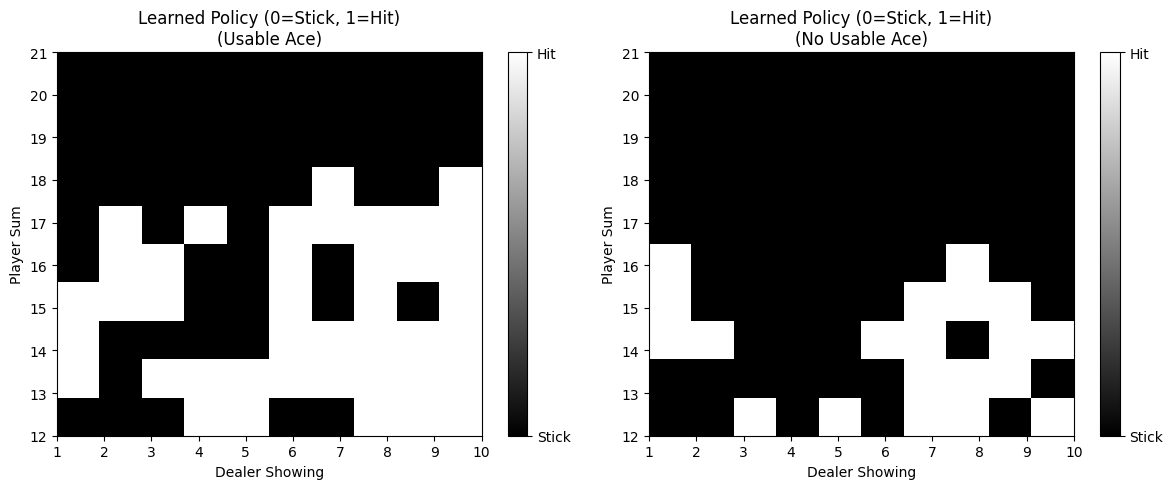

In [155]:
import numpy as np
import matplotlib.pyplot as plt

def plot_policy(policy, title="Policy (0=Stick, 1=Hit)"):
    # 10x10 map: player sum 12~21, dealer 1~10
    usable_ace = np.zeros((10, 10))
    no_usable_ace = np.zeros((10, 10))

    for player_sum in range(12, 22):
        for dealer_card in range(1, 11):
            # With usable ace
            s = (player_sum, dealer_card, True)
            usable_ace[player_sum - 12, dealer_card - 1] = policy(s)
            # Without usable ace
            s = (player_sum, dealer_card, False)
            no_usable_ace[player_sum - 12, dealer_card - 1] = policy(s)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    for ax, data, ace in zip(axs, [usable_ace, no_usable_ace], ["Usable Ace", "No Usable Ace"]):
        im = ax.imshow(data, cmap='gray', origin='lower', aspect='auto',
                       extent=[1, 10, 12, 21])
        ax.set_title(f"{title}\n({ace})")
        ax.set_xlabel("Dealer Showing")
        ax.set_ylabel("Player Sum")
        cbar = plt.colorbar(im, ax=ax, ticks=[0, 1])
        cbar.ax.set_yticklabels(['Stick', 'Hit'])
    plt.tight_layout()
    plt.show()

# Run
plot_policy(simple_policy, title="Learned Policy (0=Stick, 1=Hit)")

In [157]:
import numpy as np

# simple_policy: your learned policy (as a function)
# simple_env: your Blackjack environment

# 1. Define a random policy
def random_policy(state):
    return np.random.choice([0, 1])  # 0=stick, 1=hit

# 2. Evaluate the average return of both policies
avg_return_learned = evaluate_policy(simple_policy, simple_env, n_episodes=10000)
avg_return_random = evaluate_policy(random_policy, simple_env, n_episodes=10000)

# 3. Print the comparison results
print(f"Average return of learned policy: {avg_return_learned:.4f}")
print(f"Average return of random policy:  {avg_return_random:.4f}")

Average return of learned policy: -0.0704
Average return of random policy:  -0.3939


Homework

(1) How many data points (images) does our dataset contain? You can either just type in the number or run a command that will output the number. (Hint: you can get it easily using commands from the data inspection)

In [161]:
import requests
import zipfile
import io
from pathlib import Path

# Raw download URL for the ZIP file
ZIP_URL = "https://github.com/mbuze/GAN_microstructures_Summer_School/raw/main/data/apd_data.zip"

# Download the ZIP into memory
resp = requests.get(ZIP_URL, stream=True)
resp.raise_for_status()

# Open the ZIP in memory with zipfile
zip_in_mem = zipfile.ZipFile(io.BytesIO(resp.content))

# Filter entries ending with .png
png_files = [
    name for name in zip_in_mem.namelist()
    if name.lower().endswith(".png")
]

# Print the result
print(f"Found {len(png_files)} PNG images in the ZIP.")

Found 14164 PNG images in the ZIP.


(2) Display the 500th image from the dataset.

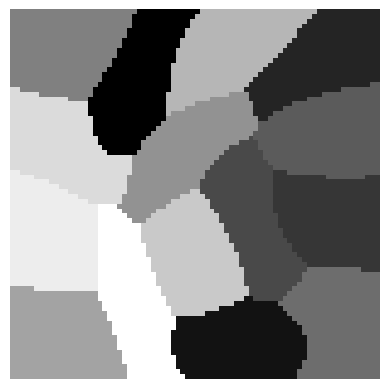

In [170]:
from PIL import Image
import io

# Read the 5000th image (zero‑based index 4999) into memory
img_data = zip_in_mem.read(png_files[4999])
img = Image.open(io.BytesIO(img_data))

# Display the image without axes
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

(3) In the presentation the images were coloured, but in the dataset the images are grayscale. Discuss why (there is a specific line of code responsible for it). Do you think that it matters? Is it beneficial or detrimental?

Grayscale maps have significant advantages and disadvantages over color maps for training microstructures:

Advantages: Only one channel is retained, which drastically reduces the amount of data and computation, and the model parameters and memory occupation are smaller; at the same time, it is not necessary to additionally consider the diversity of color mapping of different grains, which simplifies the pre-processing process and avoids irrelevant features introduced by random color matching.

Disadvantages: Since different grains are distinguished only by gray scale values, the contrast and boundary clarity between pixels are not as high as that of color maps, and the transitions between grains may appear blurred; the network will have more difficulty in learning small morphological differences, and the accuracy of edge localization and detail segmentation may be affected.

(4) What are the common features of all the images we produced? (This is ultimately what we want the machine learning algorithm to learn for itself!). Try to think of at least four different features, but feel free to list as many as you want. 

The image is defined on a regular two-dimensional pixel grid with only one label/grayscale value per pixel, with no partial pixel or anti-alignment problems and the grain profile may be both approximately polygonal and stretched to an elliptical shape, and the direction of stretching is randomly distributed across the grains.

Homework

(1) What features of the data does the Generator function seem to get right after, say, 10 epochs of optimisation?

Overall shape and structure， Dominant color schemes or intensity distributions， Simple textures or patterns

(2) What features of the data does the Generator function seem to struggle to get right even after, say, 20 epochs of optimisation?

High-frequency details and sharp edges， Realistic variations:

(3) The discriminator function is meant to distinguish between "real" data and the data artificially generated. What score do you expect it to assign to a new image generated by PyAPD, but one which was not in the training data? Explain why you think that.

I would expect the Discriminator function to assign a score closer to 0 (indicating "fake") to a new image generated by PyAPD that was not in the training data, even if the generator is performing well.

(4) More involved: verify the answer to question (3) by writing code which creates a new image using PyAPD with the same number of pixels (76x76) and with pixel values scaled to be between -1 and 1 and passes it to the trained discriminator for evaluation. This should be doable by reusing code from Part 1.

In [16]:
import torch # go-to machine learning Python library
from torch import nn # torch's neural network module
import torchvision # torch-based library for computer vision problems
from torch.utils.data import DataLoader # module to feed data to neural networks
from torchvision import datasets, transforms # module for defining and transforming torch-compatible datasets
#import torch.nn.functional as F 
import torchvision.utils as vutils # visualisation utility 

# loading the data
import os
import requests
import zipfile
from pathlib import Path

import random # random number generator
from PIL import Image # opening images from files

import numpy as np # linear algebra etc
import matplotlib.pyplot as plt # plotting

In [18]:
# (4) Validate discriminator scores for real, generated, and noise images

with torch.no_grad():
    # 1) Real samples
    real_images, _ = next(iter(dataloader_pyapd))
    real_images = real_images.to(device)
    scores_real = D(real_images).view(-1)

    # 2) Generated (fake) samples
    noise = torch.randn(batch_size, latent_dim, device=device)
    fake_images = G(noise)
    scores_fake = D(fake_images).view(-1)

    # 3) Pure noise samples
    noise_images = torch.rand(batch_size, 1, image_size, image_size, device=device) * 2 - 1
    scores_noise = D(noise_images).view(-1)

# Print average discriminator scores
print(f"Average scores → Real: {scores_real.mean():.4f}, Fake: {scores_fake.mean():.4f}, Noise: {scores_noise.mean():.4f}")

# Visualize the top 5 “most real” and bottom 5 “most fake” generated images
_, top_indices = torch.sort(scores_fake, descending=True)
print("Top 5 fake images (highest discriminator scores):")
show_images(fake_images[top_indices[:5]])
print("Bottom 5 fake images (lowest discriminator scores):")
show_images(fake_images[top_indices[-5:]])

NameError: name 'dataloader_pyapd' is not defined